In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn import preprocessing
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.covariance import EmpiricalCovariance
from sklearn import metrics

import warnings
import os
warnings.filterwarnings("ignore")
py.offline.init_notebook_mode(connected = True)

#**Preprocessing Data**

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.tail()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
103899,103899,94171,Female,disloyal Customer,23,Business travel,Eco,192,2,1,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,103900,73097,Male,Loyal Customer,49,Business travel,Business,2347,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,103901,68825,Male,disloyal Customer,30,Business travel,Business,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,103902,54173,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied
103903,103903,62567,Male,Loyal Customer,27,Business travel,Business,1723,1,3,...,1,1,1,4,4,3,1,0,0.0,neutral or dissatisfied


The following is an explanation of each feature (except Unnamed: 0 and id):
1.   Gender: Gender of the passengers (Female, Male)
2.   Customer Type: The customer type (Loyal customer, disloyal customer)
3. Age: The actual age of the passengers
4. Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)
5. Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)
6. Flight distance: The flight distance of this journey
7. Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)
8. Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient
9. Ease of Online booking: Satisfaction level of online booking
10. Gate location: Satisfaction level of Gate location
11. Food and drink: Satisfaction level of Food and drink
12. Online boarding: Satisfaction level of online boarding
13. Seat comfort: Satisfaction level of Seat comfort
14. Inflight entertainment: Satisfaction level of inflight entertainment
15. On-board service: Satisfaction level of On-board service
16. Leg room service: Satisfaction level of Leg room service
17. Baggage handling: Satisfaction level of baggage handling
18. Check-in service: Satisfaction level of Check-in service
19. Inflight service: Satisfaction level of inflight service
20. Cleanliness: Satisfaction level of Cleanliness
21. Departure Delay in Minutes: Minutes delayed when departure
22. Arrival Delay in Minutes: Minutes delayed when Arrival
23. Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

In [4]:
df.shape

(103904, 25)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [6]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [7]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

**Handling Missing Value**

In [8]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

<Axes: xlabel='Arrival Delay in Minutes', ylabel='Density'>

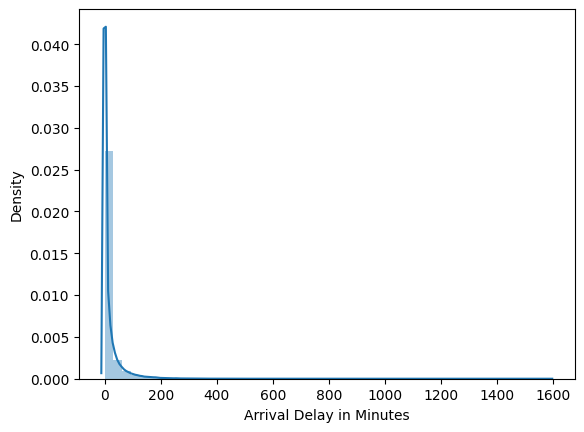

In [9]:
sns.distplot(df['Arrival Delay in Minutes'])

Since the data type of the "Arrival Delay in Minutes" feature is float and the distribution is not normal, the missing value can be filled with the median of the "Arrival Delay in Minutes" feature.

In [10]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace = True)

In [11]:
df.isnull().sum()

Unnamed: 0                           0
id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

**Data Duplicated**

In [12]:
df.duplicated().sum()

0

Based on the output above, it can be concluded that the data used has no duplicate data.

**Identification and Handling Outliers**

In [13]:
numerical_features = df.select_dtypes(exclude=["object"])
numerical_features

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,0,70172,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,1,5047,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,2,110028,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,3,24026,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,4,119299,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,23,192,2,1,2,3,2,2,2,2,3,1,4,2,3,2,3,0.0
103900,103900,73097,49,2347,4,4,4,4,2,4,5,5,5,5,5,5,5,4,0,0.0
103901,103901,68825,30,1995,1,1,1,3,4,1,5,4,3,2,4,5,5,4,7,14.0
103902,103902,54173,22,1000,1,1,1,5,1,1,1,1,4,5,1,5,4,1,0,0.0


<function matplotlib.pyplot.show(close=None, block=None)>

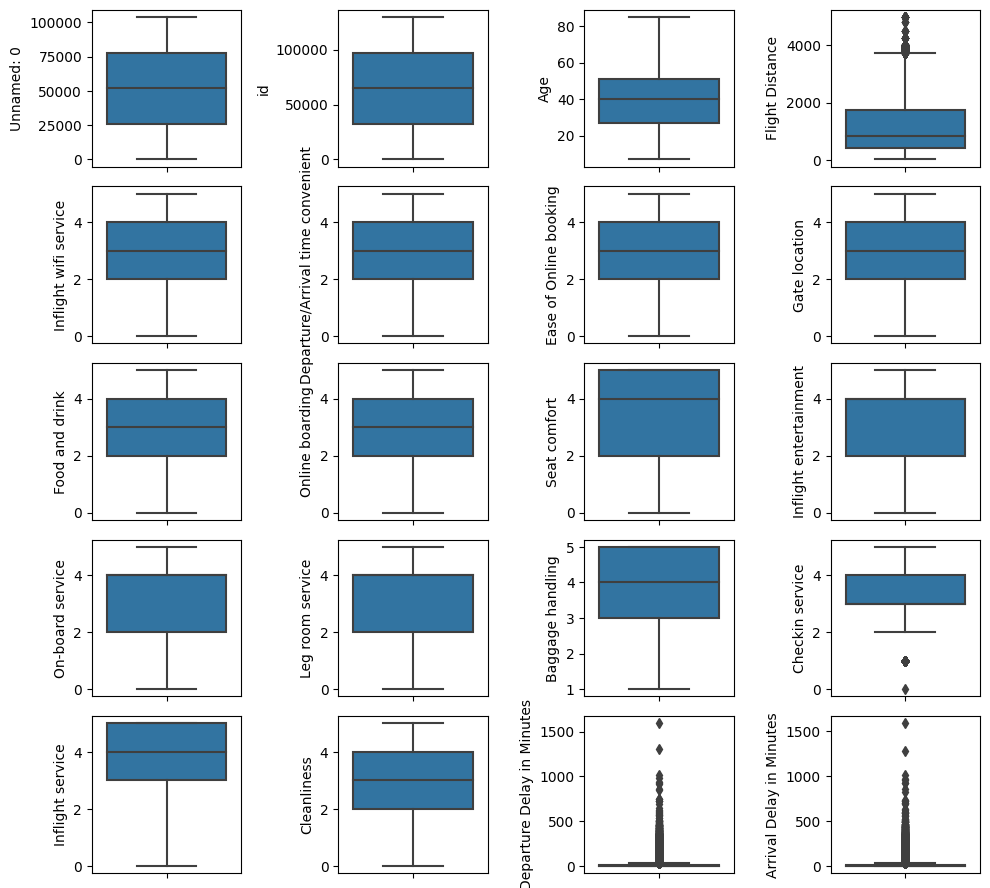

In [14]:
# @title
fig = plt.figure(figsize=(10,16))

for i in range(len(numerical_features.columns)):
  fig.add_subplot(9,4,i+1)
  sns.boxplot(y=numerical_features.iloc[:,i])

plt.tight_layout()
plt.show

The syntax is used to create a boxplot. Its purpose is to provide a visual representation of how the data is spread out, showing quartiles, medians, as well as highlighting values that are outside the upper and lower quartiles, which are often considered outliers because they are far from the majority of the data.

In [15]:
def calculate_outliers_percentage(df):

    # Calculate the interquartile range (IQR) for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

# Calculate the number of outliers in each column
    num_outliers = ((df < lower_bound) | (df > upper_bound)).sum()

    # Calculate the percentage of outliers in each column
    pct_outliers = round(num_outliers / len(df) * 100 , 4)

    return pct_outliers

In [16]:
outliers = pd.DataFrame(calculate_outliers_percentage(df), columns=['% Outliers'])
outliers.index.name = 'Column Name'
outliers.reset_index(inplace=True)
outliers_sorted = outliers.sort_values(by='% Outliers', ascending=False)
outliers_sorted

,Column Name,% Outliers
7,Departure Delay in Minutes,13.9831
1,Arrival Delay in Minutes,13.4297
3,Checkin service,12.4066
10,Flight Distance,2.2049
0,Age,0.0000
15,Inflight service,0.0000
23,id,0.0000
22,Unnamed: 0,0.0000
21,Type of Travel,0.0000
20,Seat comfort,0.0000


Perform calculations using the Interquartile Range (IQR) to get more definitive information on the percentage of outliers in the data.

In [17]:
Q1 = (df[['Flight Distance','Checkin service', 'Departure Delay in Minutes','Arrival Delay in Minutes']]).quantile(0.25)
Q3 = (df[['Flight Distance','Checkin service', 'Departure Delay in Minutes','Arrival Delay in Minutes']]).quantile(0.75)
IQR = Q3-Q1

max = Q3 + (1.5*IQR)
min = Q1 - (1.5*IQR)

df['Flight Distance'].mask(df['Flight Distance']>max['Flight Distance'],max['Flight Distance'],inplace=True)
df['Checkin service'].mask(df['Checkin service']<min['Checkin service'],min['Checkin service'],inplace=True)
df['Departure Delay in Minutes'].mask(df['Departure Delay in Minutes']>max['Departure Delay in Minutes'],max['Departure Delay in Minutes'],inplace=True)
df['Arrival Delay in Minutes'].mask(df['Arrival Delay in Minutes']>max['Arrival Delay in Minutes'],max['Arrival Delay in Minutes'], inplace=True)

In [18]:
outliers = pd.DataFrame(calculate_outliers_percentage(df), columns=['% Outliers'])
outliers.index.name = 'Column Name'
outliers.reset_index(inplace=True)
outliers_sorted = outliers.sort_values(by='% Outliers', ascending=False)
outliers_sorted

,Column Name,% Outliers
0,Age,0.0
13,Gender,0.0
23,id,0.0
22,Unnamed: 0,0.0
21,Type of Travel,0.0
20,Seat comfort,0.0
19,Online boarding,0.0
18,On-board service,0.0
17,Leg room service,0.0
16,Inflight wifi service,0.0


The outliers found are renumbered using the predefined limits.

**Encoding**

Converts a non-numeric data type to numeric by using a label encoder.

In [19]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                      float64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                      float64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [20]:
from sklearn.preprocessing import LabelEncoder
# convert all non-numeric variables to numeric type
for column in df.columns:
    if df[column].dtype == np.number: continue
    # Perform Encoding for each non-numeric variables
    df[column] = LabelEncoder().fit_transform(df[column])

In [21]:
df.dtypes.value_counts()

int64      22
float64     3
dtype: int64

In [22]:
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,56192,1,0,6,1,2,460.0,3,4,...,5,4,3,3,4.0,5,5,25,18.0,0
1,1,3978,1,1,18,0,0,235.0,3,2,...,1,1,5,2,1.5,4,1,1,6.0,0
2,2,88045,0,0,19,0,0,1142.0,2,2,...,5,4,3,3,4.0,4,5,0,0.0,1
3,3,19148,0,0,18,0,0,562.0,2,5,...,2,2,5,2,1.5,4,2,11,9.0,0
4,4,95443,1,0,54,0,0,214.0,3,3,...,3,3,4,3,3.0,3,3,0,0.0,1


#**EDA**

In [23]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

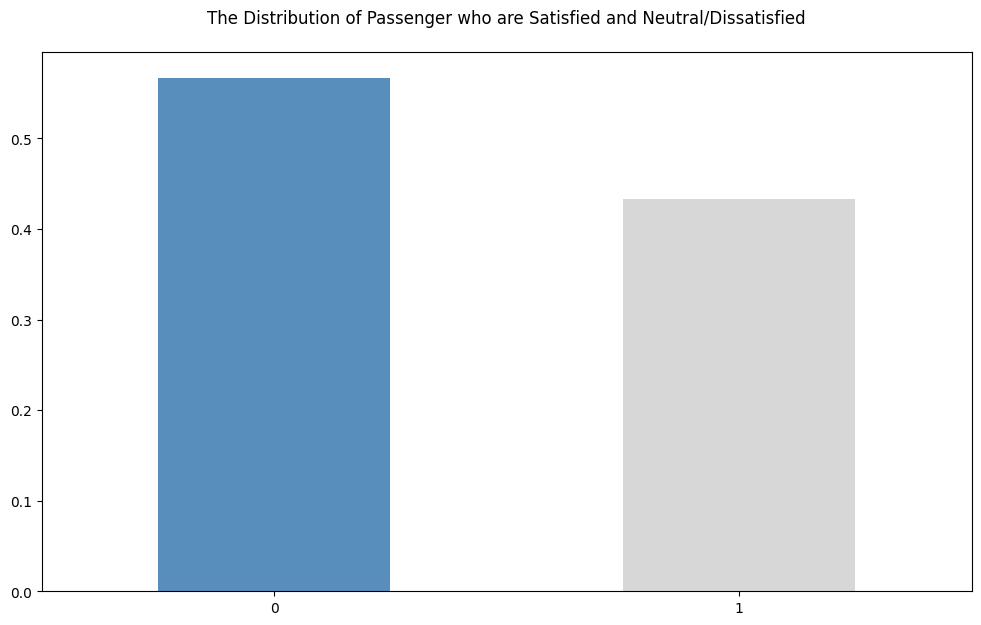

In [24]:
fig = plt.figure(figsize = (12,7))
df.satisfaction.value_counts(normalize=True).plot(kind='bar', color= ['steelblue','lightgrey'], alpha = 0.9, rot=0)
plt.title('The Distribution of Passenger who are Satisfied and Neutral/Dissatisfied\n')
plt.show()

The plot above shows a distribution of about 55%:45% between neutral/dissatisfied passengers and satisfied passengers. So, we can say that this data is fairly balanced.

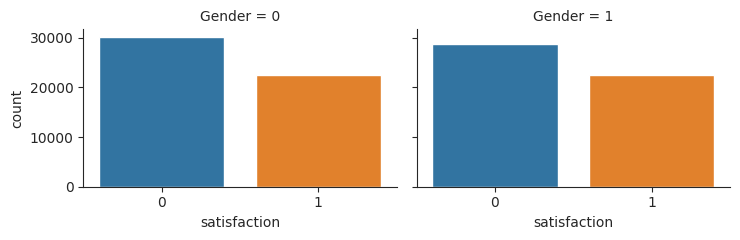

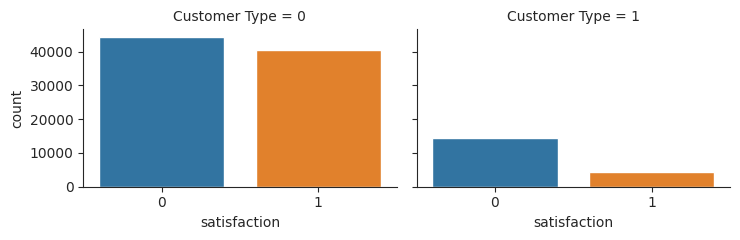

In [25]:
# Gender and Customer type
with sns.axes_style(style='ticks'):
    g = sns.catplot(x="satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.5)
    g = sns.catplot(x="satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count", height=2.5, aspect=1.5)

Gender:
It is observed that the gender distribution of neutral/dissatisfied customers and satisfied customers is similar. For both male and female passengers, the number of neutral/dissatisfied customers is higher than the number of satisfied customers.

Customer Type:
Even among the high number of loyal passengers, the ratio of satisfied and neutral/dissatisfied customers is almost equal, at around 49:51.

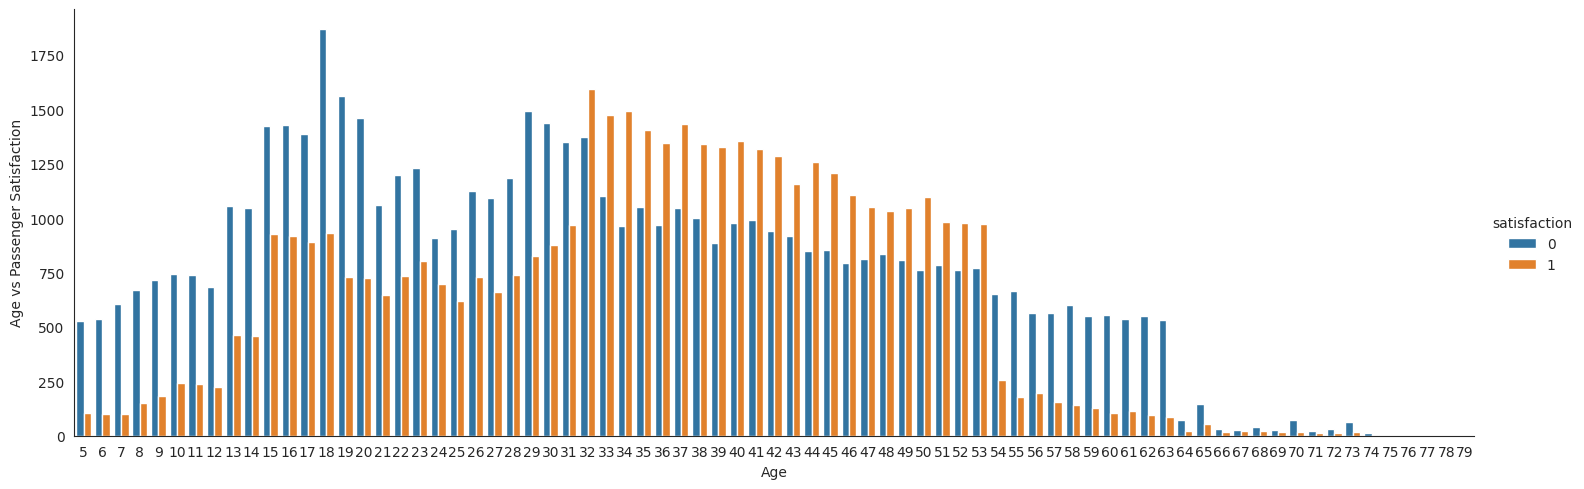

In [26]:
with sns.axes_style('white'):
    g = sns.catplot(x="Age", data=df, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

From ages 7 to 31 and from ages 54 to 72, the number of neutral/dissatisfied passengers is very high compared to the number of satisfied passengers. On the other hand, in the age group of 32-53, the number of satisfied passengers is higher than that of neutral/dissatisfied passengers.

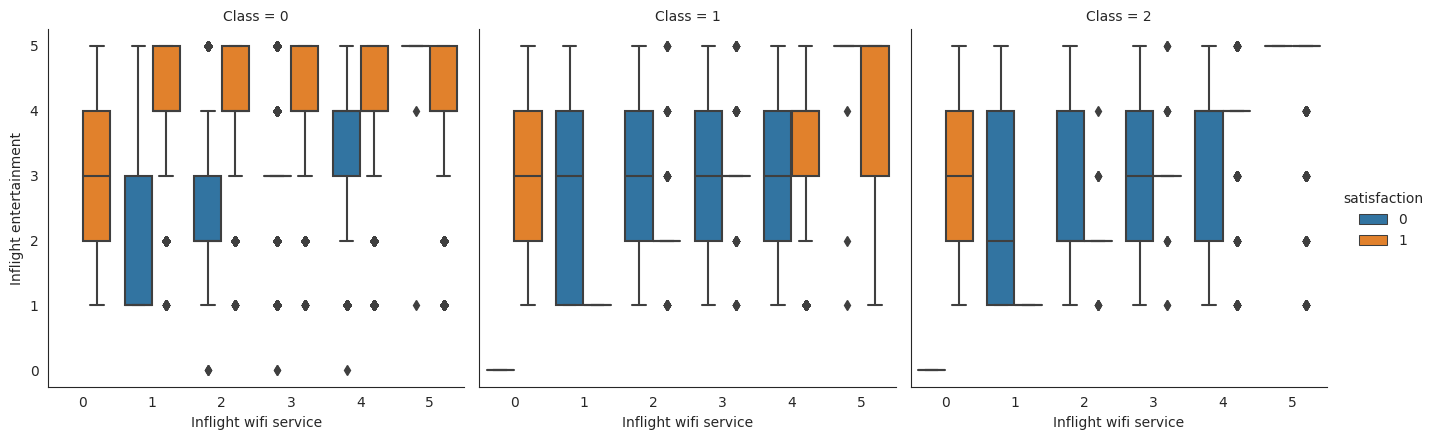

In [27]:
# Inflight_wifi_service and Inflight_entertainment by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight wifi service", y="Inflight entertainment", hue="satisfaction", col="Class", data=df, kind="box", height=4.5, aspect=1.0)

Inflight Entertainment, Inflight wi-fi Service grouped by Class:

Eco Plus class passengers are generally satisfied with no in-flight Wi-Fi service (rating 0) and with a moderate level of in-flight entertainment (rating 2 - 4). For Business class passengers, only the highest level of in-flight entertainment (rating 5) can make them satisfied. For Economy class passengers, a high level of in-flight entertainment (rating 3 - 5) and a very high availability of Wi-Fi service (rating 5) can make them satisfied.

#**Feature Selection**

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  int64  
 3   Customer Type                      103904 non-null  int64  
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  int64  
 6   Class                              103904 non-null  int64  
 7   Flight Distance                    103904 non-null  float64
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-null  int64  
 11  Gate location                      1039

In [29]:
df = df.drop(['Unnamed: 0', 'id'], axis=1)

<Axes: >

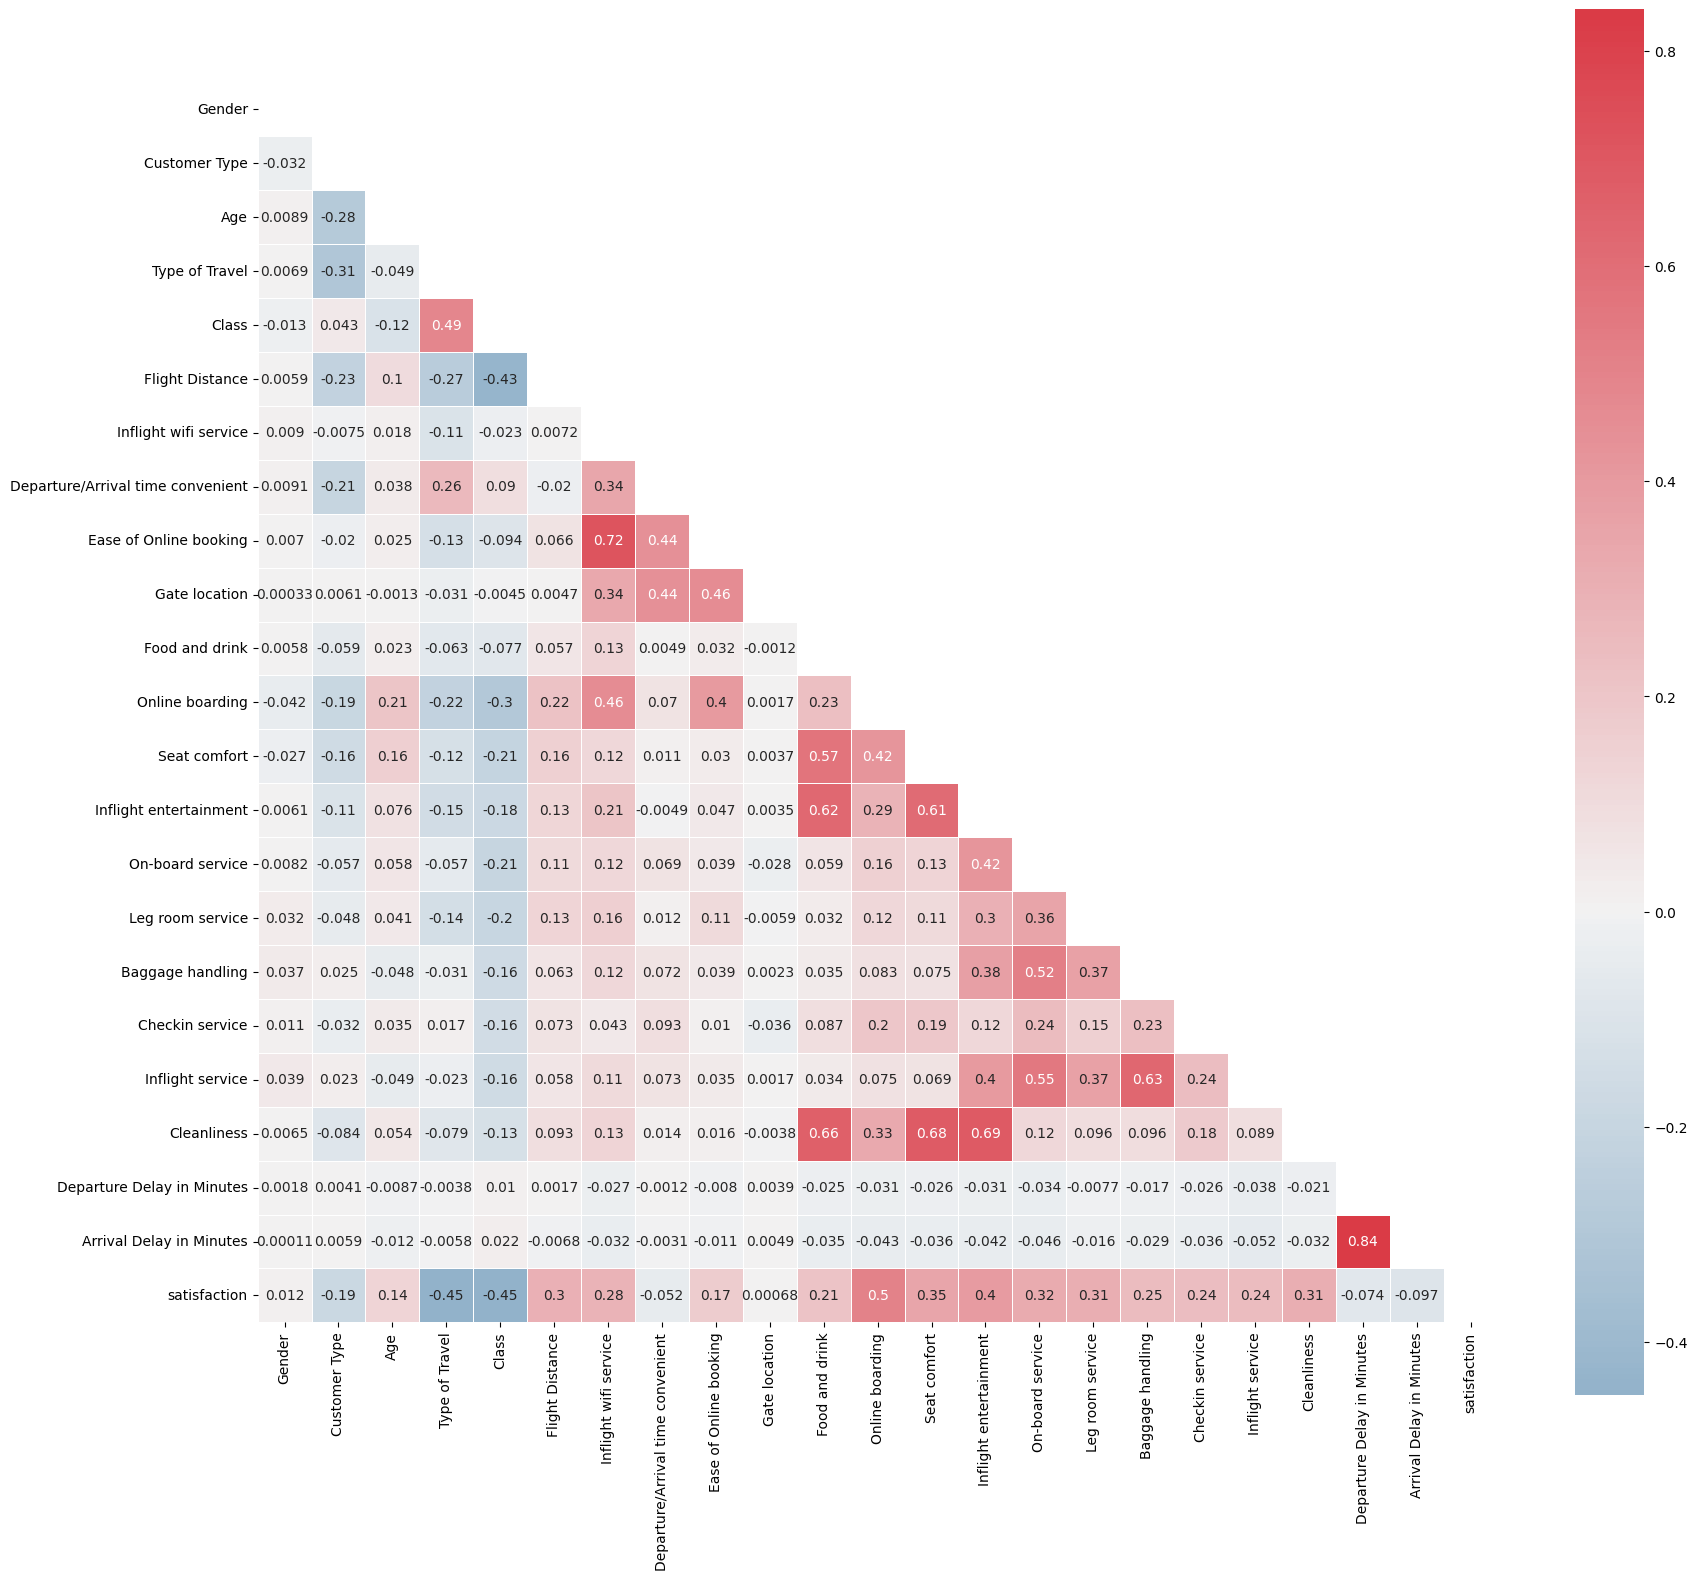

In [30]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(240, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

variabel "Ease_of_Online_booking" sangat berkorelasi dengan variabel "Inflight_wifi_service" dan variabel "Inflight_service" sangat berkorelasi dengan variabel "Baggage_handling". Namun, tidak ada pasangan variabel yang memiliki koefisien korelasi tepat sama dengan 1. Oleh karena itu, tidak ada multi-kolinearitas yang sempurna. Oleh karena itu, kami tidak akan menghapus variabel manapun.

In [31]:
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(df)
modified_data = pd.DataFrame(r_scaler.transform(df), columns=df.columns)
modified_data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.0,0.0,0.081081,1.0,1.0,0.115774,0.6,0.8,0.6,0.2,...,1.0,0.8,0.6,0.75,0.714286,1.0,1.0,0.833333,0.553846,0.0
1,1.0,1.0,0.243243,0.0,0.0,0.055053,0.6,0.4,0.6,0.6,...,0.2,0.2,1.0,0.50,0.000000,0.8,0.2,0.033333,0.184615,0.0
2,0.0,0.0,0.256757,0.0,0.0,0.299825,0.4,0.4,0.4,0.4,...,1.0,0.8,0.6,0.75,0.714286,0.8,1.0,0.000000,0.000000,1.0
3,0.0,0.0,0.243243,0.0,0.0,0.143300,0.4,1.0,1.0,1.0,...,0.4,0.4,1.0,0.50,0.000000,0.8,0.4,0.366667,0.276923,0.0
4,1.0,0.0,0.729730,0.0,0.0,0.049386,0.6,0.6,0.6,0.6,...,0.6,0.6,0.8,0.75,0.428571,0.6,0.6,0.000000,0.000000,1.0


In [32]:
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Checkin service'],
      dtype='object')


Terdapat 12 fitur yang memiliki pengaruh besar terhadap kolom target (kolom 'satisfaction') diantaranya yaitu 'Customer Type', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Checkin service', 'Cleanliness'

#**Data Split**

In [33]:
columns_for_X = ['Customer Type', 'Type of Travel', 'Class', 'Flight Distance',
       'Inflight wifi service', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Checkin service']
X = df[columns_for_X]
y = df['satisfaction']

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
print(X_train.shape)
print(X_test.shape)

(83123, 10)
(20781, 10)


In [36]:
print(y_train.shape)
print(y_test.shape)

(83123,)
(20781,)


##**Create a Model Using KNN**

In [37]:
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

k_values = [3, 5, 7]
confusion_matrices = {}
scores = {}

for k in k_values:
    # Melatih model KNN dengan nilai k yang berbeda
    cov = EmpiricalCovariance().fit(X_train)
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'V': cov.covariance_})
    knn.fit(X_train, y_train)

    # Melakukan prediksi pada data pengujian
    y_pred = knn.predict(X_test)

    # Menyimpan laporan klasifikasi untuk setiap nilai k
    scores[k] = classification_report(y_test, y_pred)

    # Menghitung matriks kebingungan untuk setiap nilai k
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[k] = cm

# Menampilkan laporan klasifikasi untuk setiap nilai k
for k, score in scores.items():
    print(f"Classification Report for k = {k}")
    print(score)

# Menampilkan nilai TP, TN, FP, dan FN dari masing-masing nilai k
for k, cm in confusion_matrices.items():
    TN, FP, FN, TP = cm[0, 0], cm[0, 1], cm[1, 0], cm[1, 1]
    print(f"For k = {k}:")
    print(f"True Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}")
    print("\n")

Classification Report for k = 3
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11770
           1       0.94      0.90      0.92      9011

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781

Classification Report for k = 5
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11770
           1       0.94      0.90      0.92      9011

    accuracy                           0.93     20781
   macro avg       0.93      0.93      0.93     20781
weighted avg       0.93      0.93      0.93     20781

Classification Report for k = 7
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     11770
           1       0.94      0.90      0.92      9011

    accuracy                           0.93     20781
   macro avg       0.93      0.9

Judging from the classification reports for the three tested k values, it can be concluded that the KNN model tends to provide similar performance for different k values (k = 3, 5, and 7). This can be seen from the relatively similar values of precision, recall, f1-score, and accuracy among the three cases. Although there are slight differences in some metrics between the different k values, the differences are not substantially significant.
In this case, it can be seen that the model evaluation values (precision, recall, f1-score, and accuracy) do not change significantly as the k value changes from 3 to 5 and to 7. This could indicate that the model is not very sensitive to changes in the k value within the tested range.

Based on the table above, the accuracy value of the model is 93%, indicating that your model can correctly predict about 93% of the training data. The model also produces precision, recall, F1-score values above 90%. This shows that the model created has good quality in classifying data.